In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time

In [2]:
data = pd.read_csv('../data/buildings_train.csv')
metadata = pd.read_json('../data/buildings_meta.json')

In [3]:
data.head()

,id,new,latitude,longitude,district,street,address,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating
0,264,0.0,55.518117,37.355139,11.0,улица 1-я Нововатутинская,3,2019.0,2.0,12.0,1.0,1.0,1.0,0.0,1.0,3.0
1,6079,0.0,55.641920,37.352156,7.0,мкр. 10-й,к1014,1981.0,3.0,22.0,0.0,1.0,1.0,NaN,1.0,0.0
2,5829,0.0,55.770011,37.386220,7.0,Рублевское шоссе,68,2002.0,3.0,24.0,0.0,1.0,1.0,NaN,NaN,0.0
3,5758,0.0,55.739934,37.426070,7.0,Рублевское шоссе,93К2,2011.0,3.0,17.0,0.0,1.0,1.0,NaN,1.0,0.0
4,6761,0.0,55.649921,37.467994,7.0,улица Академика Анохина,58К2,2005.0,3.0,22.0,0.0,1.0,1.0,NaN,0.0,0.0


In [4]:
metadata

,name,type,desc,cats
0,id,integer_id,Unique ID of building for joining with apartments,NaN
1,new,boolean,Whether it is an old or new building,NaN
2,latitude,real,Latitude coordinate of building,NaN
3,longitude,real,Longitude coordinate of building,NaN
4,district,categorical,Administriative district within Moscow,"[Central, North, North-East, East, South-East,..."
5,street,string,Bulding street name,NaN
6,address,string,Building address (within street),NaN
7,constructed,integer,Year when the building was constructed,NaN
8,material,categorical,Primary building material used in building,"[Bricks, Wood, Monolith, Panel, Block, Monolit..."
9,stories,integer,Total number of floors in the building,NaN


<AxesSubplot:>

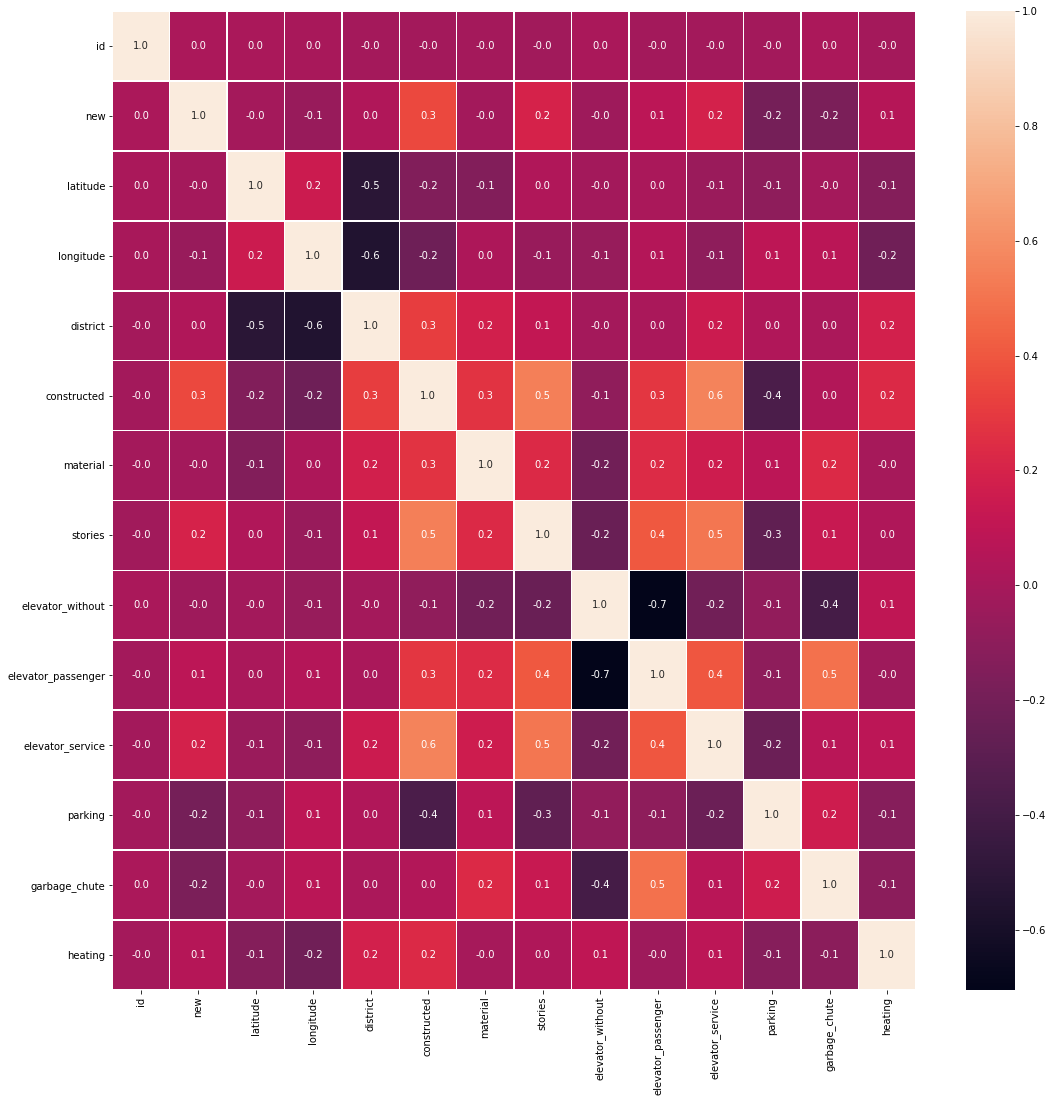

In [6]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [7]:
train_apartment = pd.read_csv('../data/apartments_train.csv')
train_building = pd.read_csv('../data/buildings_train.csv')
train = pd.merge(train_apartment, train_building, left_on='building_id', right_on='id')
#train.rename(columns={'id_x' : 'apartment_id', 'id_y' : 'building_id'}, inplace=True)
train.rename(columns={'id_x' : 'apartment_id'}, inplace=True)
train.drop('id_y', axis=1, inplace=True)
# Remove duplicate column after merge.

In [13]:
train.head()
print(train.columns)

Index(['apartment_id', 'seller', 'price', 'area_total', 'area_kitchen',
       'area_living', 'floor', 'rooms', 'layout', 'ceiling',
       'bathrooms_shared', 'bathrooms_private', 'windows_court',
       'windows_street', 'balconies', 'loggias', 'condition', 'phones',
       'building_id', 'new', 'latitude', 'longitude', 'district', 'street',
       'address', 'constructed', 'material', 'stories', 'elevator_without',
       'elevator_passenger', 'elevator_service', 'parking', 'garbage_chute',
       'heating'],
      dtype='object')


In [16]:
list = ['seller', 'area_total', 'area_kitchen',
       'area_living', 'floor', 'rooms', 'layout', 'ceiling',
       'bathrooms_shared', 'bathrooms_private', 'windows_court',
       'windows_street', 'balconies', 'loggias', 'condition', 'phones']
data = train.drop(list, axis=1)
data.tail()

,apartment_id,price,building_id,new,latitude,longitude,district,street,address,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating
23280,23228,12500000.0,8621,0.0,55.468208,37.289436,10.0,бульвар Троицкий,3,2016.0,NaN,6.0,0.0,1.0,1.0,NaN,NaN,0.0
23281,23229,5250000.0,694,0.0,55.476128,37.295266,10.0,проспект Октябрьский,9,1991.0,4.0,16.0,0.0,1.0,0.0,NaN,1.0,0.0
23282,23248,13500000.0,5758,0.0,55.739934,37.426070,7.0,Рублевское шоссе,93К2,2011.0,3.0,17.0,0.0,1.0,1.0,NaN,1.0,0.0
23283,23250,18900000.0,2857,NaN,55.534816,37.526313,6.0,Южнобутовская улица,75,2001.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
23284,23271,10890000.0,6761,0.0,55.649921,37.467994,7.0,улица Академика Анохина,58К2,2005.0,3.0,22.0,0.0,1.0,1.0,NaN,0.0,0.0


In [17]:
x = data.drop('price', axis=1)
y = data['price']